# Milestone 2 - Exploração dos dados
Neste notebook é realizada a exploração profunda do dataset **IBM HR Analytics Employee Attrition & Performance**, com o objetivo de ...
# Autores: et al. (realizado por todos)

## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Pandas versão:", pd.__version__)
print("NumPy versão:", np.__version__)
print("Matplotlib versão:", plt.matplotlib.__version__)
print("Seaborn versão:", sns.__version__)
# Autores: et al. (realizado por todos)

Pandas versão: 2.3.3
NumPy versão: 2.0.2
Matplotlib versão: 3.10.0
Seaborn versão: 0.13.2


## 2. Carregamento do Dataset

In [2]:
df = pd.read_csv(
    "/kaggle/input/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv"
)

print("Dataset carregado com sucesso.")
# Autores: et al. (realizado por todos)

Dataset carregado com sucesso.


## 3. Identificação e Remoção de Variáveis Irrelevantes

In [3]:
# Identificar colunas com variância zero (valor único)
print("Colunas constantes:", df.columns[df.nunique() == 1].tolist())

# Remover variáveis irrelevantes
colunas_remover = ["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"]
df = df.drop(columns=colunas_remover)

print(f"\nColunas removidas com sucesso. O dataset passou a ter {df.shape[1]} variáveis.")
# Autor: Luís Figueira

Colunas constantes: ['EmployeeCount', 'Over18', 'StandardHours']

Colunas removidas com sucesso. O dataset passou a ter 31 variáveis.


## 4.Análise Exploratória de Dados

### 4.1 Distribuição da Variável Alvo 
Verificação do desequilíbrio de classes na variável `Attrition`.

In [4]:
attrition_perc = df["Attrition"].value_counts(normalize=True) * 100
print("Distribuição da Variável Alvo (Desequilíbrio de Classes)")
print(f"  Fica (No):  {attrition_perc['No']:.2f}%")
print(f"  Sai (Yes): {attrition_perc['Yes']:.2f}%")

Distribuição da Variável Alvo (Desequilíbrio de Classes)
  Fica (No):  83.88%
  Sai (Yes): 16.12%


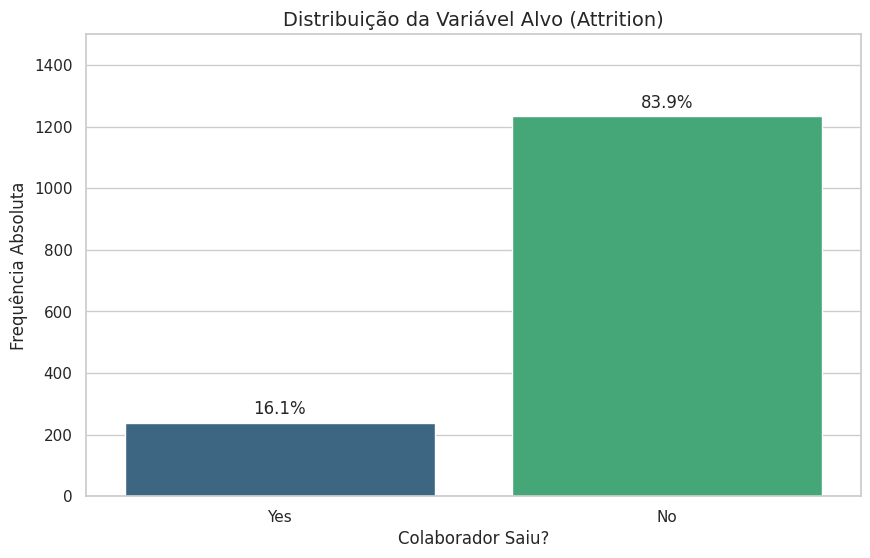

In [5]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

plt.figure()

ax = sns.countplot(x='Attrition', data=df, hue='Attrition', palette='viridis', legend=False)

plt.title('Distribuição da Variável Alvo (Attrition)', fontsize=14)
plt.xlabel('Colaborador Saiu?')
plt.ylabel('Frequência Absoluta')

ax.set_ylim(0, 1500)
# apenas por questão de estética do gráfico

total = len(df['Attrition'])
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

### 4.2. Correlações Relevantes

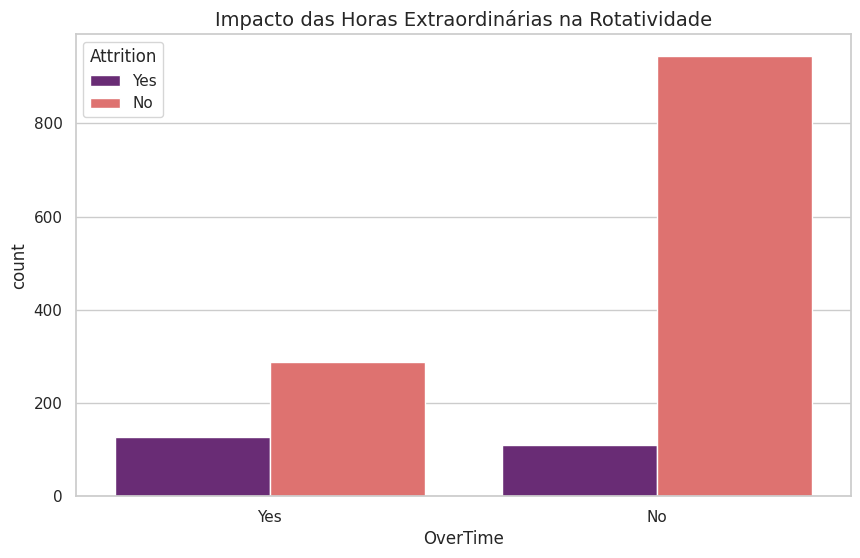

--- Taxa de Rotatividade (Attrition) por Horas Extraordinárias (OverTime) ---
Attrition      No     Yes
OverTime                 
No         89.56%  10.44%
Yes        69.47%  30.53%


In [6]:
# Relação entre OverTime e Attrition, para responder a segunda pergunta de Investigação
plt.figure()
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='magma')
plt.title('Impacto das Horas Extraordinárias na Rotatividade', fontsize=14)
plt.show()


overtime_attrition_perc = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

print("--- Taxa de Rotatividade (Attrition) por Horas Extraordinárias (OverTime) ---")

print(overtime_attrition_perc.round(2).astype(str) + '%')